# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [46]:
data.shape

(3864, 19)

In [47]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [48]:
data.head()

Location Code Type                      Code  NDC  Rev Code  \
0  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 013  NaN       NaN   
1  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 022  NaN       NaN   
2  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 024  NaN       NaN   
3  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 025  NaN       NaN   
4  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 026  NaN       NaN   

  Procedure                              Procedure Description  Quantity  \
0     MS013  Tracheostomy For Face, Mouth And Neck Diagnose...         1   
1     MS022  Intracranial Vascular Procedures With Principa...         1   
2     MS024  Craniotomy With Major Device Implant Or Acute ...         1   
3     MS025  Craniotomy And Endovascular Intracranial Proce...         1   
4     MS026  Craniotomy And Endovascular Intracranial Proce...         1   

           Payer  IP Charge  IP Expected Reimbursement  MIN_IP_XR  MAX_IP_XR  \
0  AETNA [65000]   59006.00                   31705.95   11936.11   31705.95   
1  AETNA [65000]   61399.00                   61399.00   15963.74   61399.00   
2  AETNA [65000]   72401.56                        NaN    7770.00   23719.14   
3  AETNA [65000]   76565.21                   57449.30    7770.00   57449.30   
4  AETNA [65000]   64748.06                   29999.01    2913.75   29999.01   

   IP Cash Price  OP Charge  OP Expected Reimbursement  MIN_OP_XR  MAX_OP_XR  \
0       15341.56          0                        NaN        NaN        NaN   
1       15963.74          0                        NaN        NaN        NaN   
2       18824.41          0                        NaN        NaN        NaN   
3       19906.95          0                        NaN        NaN        NaN   
4       16834.50          0                        NaN        NaN        NaN   

   OP Cash Price  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

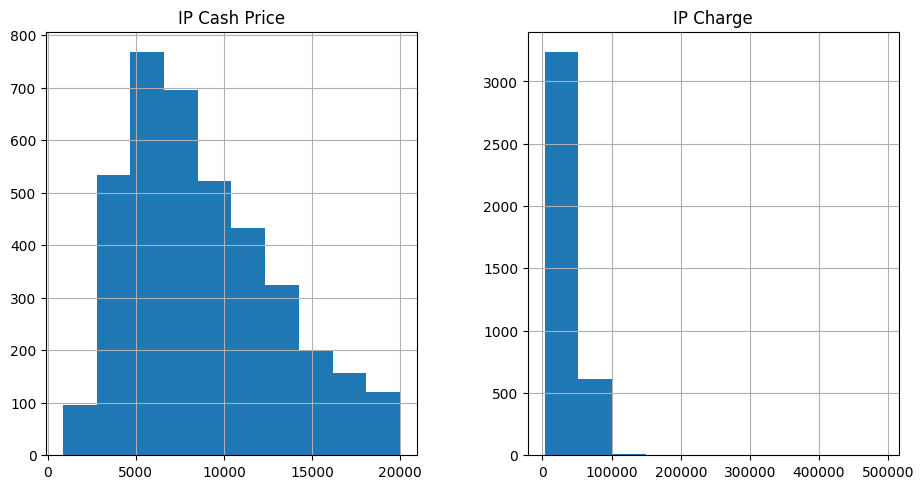

In [49]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

In [50]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

In [51]:
high_cost_filter = data['IP Charge'] > 100000

data.loc[high_cost_filter]


Location Code Type                      Code  NDC  Rev Code  \
800   BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 263  NaN       NaN   
858   BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 344  NaN       NaN   
934   BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 461  NaN       NaN   
1171  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 802  NaN       NaN   
1264  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 939  NaN       NaN   
1945  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 037  NaN       NaN   
2091  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 263  NaN       NaN   
2138  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 333  NaN       NaN   
2149  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 344  NaN       NaN   
2192  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 408  NaN       NaN   
2400  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 707  NaN       NaN   
2462  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 802  NaN       NaN   
2555  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 939  NaN       NaN   
2565  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 955  NaN       NaN   
2581  BHMC LITTLE ROCK       DRG  MS-DRG V38 (FY 2021) 999  NaN       NaN   

     Procedure                              Procedure Description  Quantity  \
800      MS263                        Vein Ligation And Stripping         1   
858      MS344    Minor Small And Large Bowel Procedures With McC         1   
934      MS461  Bilateral Or Multiple Major Joint Procedures O...         1   
1171     MS802  Other O.R. Procedures Of The Blood And Blood F...         1   
1264     MS939  O.R. Procedures With Diagnoses Of Other Contac...         1   
1945     MS037                   Extracranial Procedures With McC         1   
2091     MS263                        Vein Ligation And Stripping         1   
2138     MS333                           Rectal Resection With Cc         1   
2149     MS344    Minor Small And Large Bowel Procedures With McC         1   
2192     MS408  Biliary Tract Procedures Except Only Cholecyst...         1   
2400     MS707           Major Male Pelvic Procedures With Cc/McC         1   
2462     MS802  Other O.R. Procedures Of The Blood And Blood F...         1   
2555     MS939  O.R. Procedures With Diagnoses Of Other Contac...         1   
2565     MS955         Craniotomy For Multiple Significant Trauma         1   
2581     MS999                                        Ungroupable         1   

                            Payer  IP Charge  IP Expected Reimbursement  \
800               ALLWELL [15100]  120026.89                        NaN   
858               ALLWELL [15100]  102435.46                   16684.09   
934               ALLWELL [15100]  121126.29                        NaN   
1171              ALLWELL [15100]  143667.09                        NaN   
1264              ALLWELL [15100]  480809.48                        NaN   
1945  ARKANSAS TOTAL CARE [40700]  123035.47                        NaN   
2091  ARKANSAS TOTAL CARE [40700]  121981.89                        NaN   
2138  ARKANSAS TOTAL CARE [40700]  128929.41                        NaN   
2149  ARKANSAS TOTAL CARE [40700]  104304.46                        NaN   
2192  ARKANSAS TOTAL CARE [40700]  108898.78                        NaN   
2400  ARKANSAS TOTAL CARE [40700]  125925.00                        NaN   
2462  ARKANSAS TOTAL CARE [40700]  146969.09                    9725.00   
2555  ARKANSAS TOTAL CARE [40700]  490685.48                        NaN   
2565  ARKANSAS TOTAL CARE [40700]  104899.20                   29125.00   
2581  ARKANSAS TOTAL CARE [40700]  167432.29                        NaN   

      MIN_IP_XR  MAX_IP_XR  IP Cash Price  OP Charge  \
800         NaN        NaN            NaN          0   
858    16684.09   32536.01       17614.77          0   
934     8741.25    9225.00            NaN          0   
1171    9725.00   10204.12       10204.12          0   
1264    7790.37    7790.37        7

### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:


In the initial portion of the histograms, it is evident that two histograms display the data for the "IP Cash Price" and "IP Charge" columns. The code specifies the dimensions of these histograms as 11 inches in width and 5.5 inches in height.

However, in the subsequent section where the histograms are generated, the Python code incorporates a customizable attribute for the X-axis. Consequently, the X-axis ticks for both histograms are configured to span from 0 to 4000.

Consequently, upon close examination of these two histogram sections, it becomes apparent that they exhibit slight variations despite employing the same dataset.

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

In [52]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

(0.0, 40000.0)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:

I see the brilliance behind this data.   
        
This graph shows KDE plots for 3 different probability distribution objects, allowing us to visualize and compare their shapes and densities. The KDEs provide a nonparametric density estimate of the underlying distributions. In this graph as we see, when the price is approximately 2500 to 14000, IP cash Price (blue line) is the higher than others. It means that people tend to pay on their own without using the insurance. However, when the price approximately 20000 to 30000, people rarely pay by themselves.  
Moreover, the graph highlights another scenario. When the amount is below around 19000, hospitals believe they can receive payments that surpass the maximum amount for which they can submit a bill to an insurance company.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [53]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [54]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

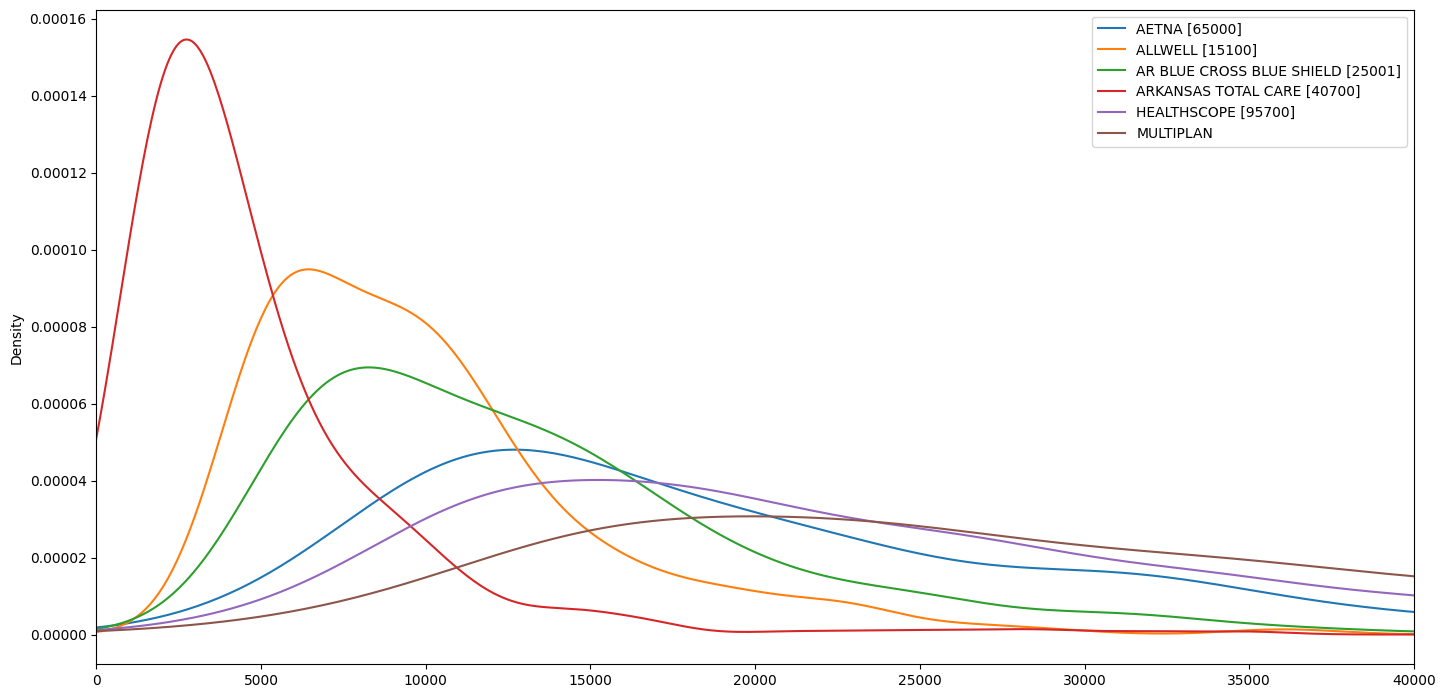

In [55]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:

Based on the presented KDE diagram, it illustrates six probability distributions related to the IP Expected Reimbursement by various payers. Notably, the payer "ARKANSAS TOTAL CARE" exhibits the highest peak in the graph, and this peak is skewed to the left. This indicates that the majority of IP Expected Reimbursement prices associated with "ARKANSAS TOTAL CARE" are relatively low.

In contrast, payers "HEALTHSCOPE" and "MULTIPLAN" do not display distinct curves in their distributions. Interestingly, all payers demonstrate their highest peaks on the left side of the pattern.

---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

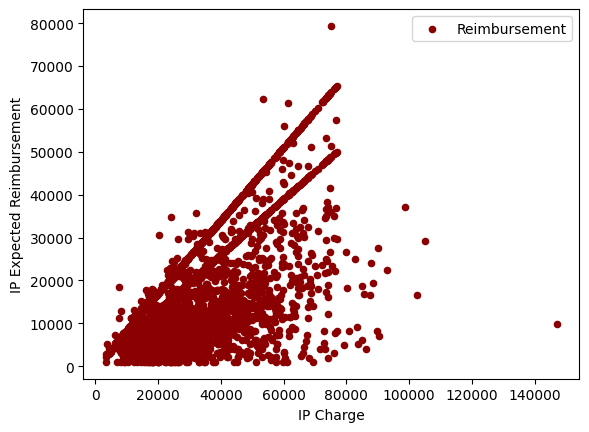

In [56]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

<ipython-input-57-7b284550e202>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


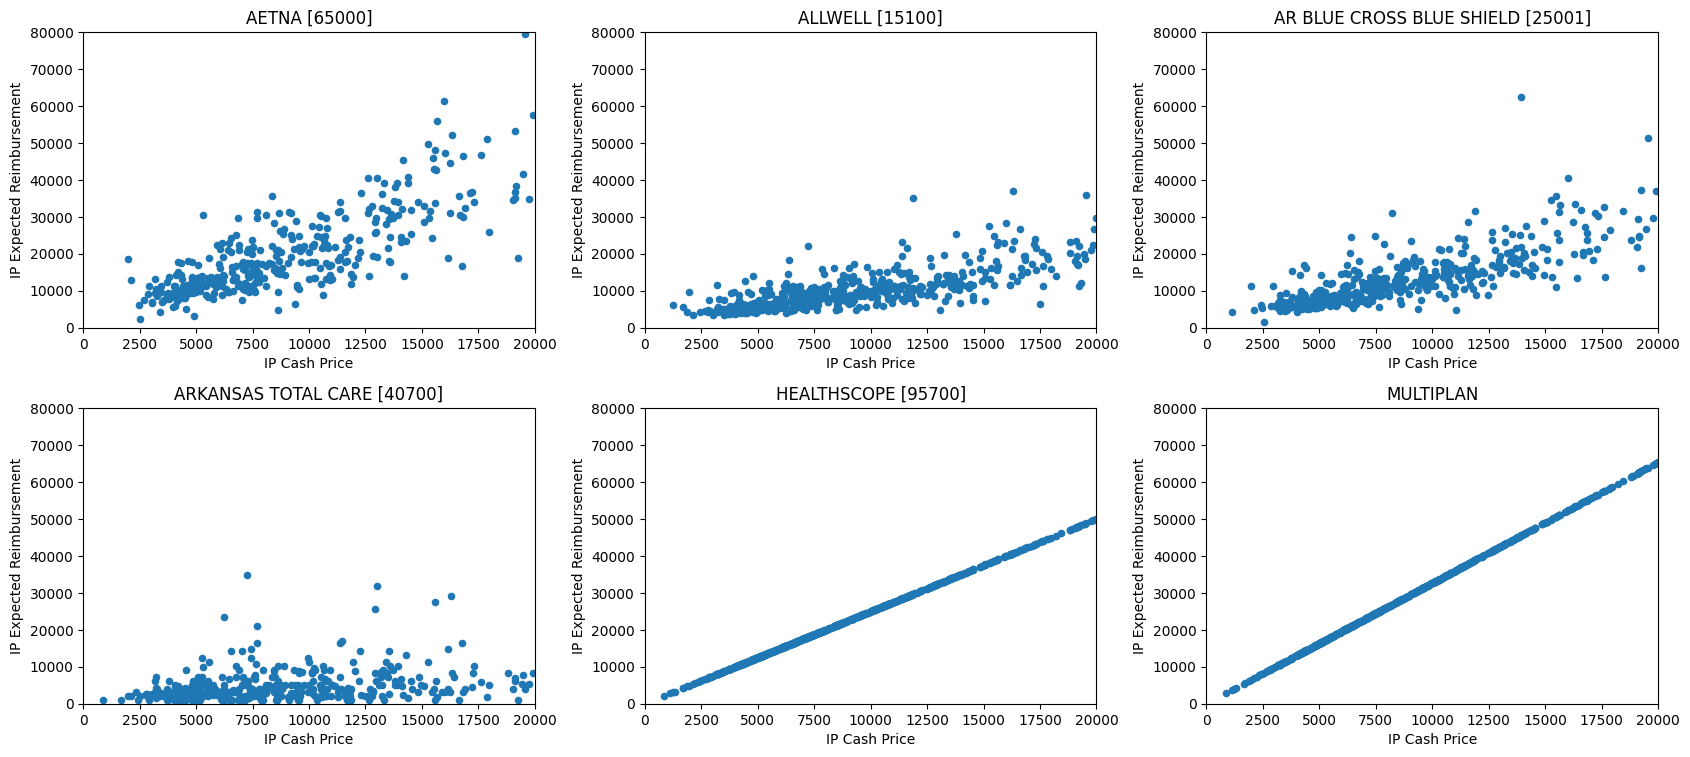

In [57]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

Based on the preceding graphical representations, it is evident that there exists a relationship between "IP Charge" and "IP Expected Reimbursement" across all payers. Specifically, payers such as "HEALTHSCOPE" and "MULTIPLAN" exhibit a distinct trendline, indicating a strong correlation between these two variables.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [58]:
# Your code here to load data...

"""
Upload data file frm a local drive.
Dataset:National Obesity By State from Data.gov
Url: https://catalog.data.gov/dataset/national-obesity-by-state-d765a
"""
import os
from google.colab import files


uploaded = files.upload()


Saving National_Obesity_By_State.csv to National_Obesity_By_State (1).csv


In [59]:
#Read Data
df2 = pd.read_csv('National_Obesity_By_State.csv')


df2.columns

Index(['FID', 'NAME', 'Obesity', 'SHAPE_Length', 'SHAPE_Area'], dtype='object')

In [60]:
df2

FID                  NAME  Obesity  SHAPE_Length    SHAPE_Area
0     1                 Texas     32.4  1.540832e+07  7.672329e+12
1     2            California     24.2  1.451870e+07  5.327809e+12
2     3              Kentucky     34.6  6.346699e+06  1.128830e+12
3     4               Georgia     30.7  5.795596e+06  1.652980e+12
4     5             Wisconsin     30.7  6.806782e+06  1.567816e+12
5     6                Oregon     30.1  7.976011e+06  3.178446e+12
6     7              Virginia     29.2  7.710804e+06  1.158804e+12
7     8             Tennessee     33.8  6.350377e+06  1.177054e+12
8     9             Louisiana     36.2  7.383857e+06  1.355094e+12
9    10              New York     25.0  7.981383e+06  1.411441e+12
10   11              Michigan     31.2  1.240799e+07  1.657222e+12
11   12                 Idaho     28.6  9.081125e+06  2.593598e+12
12   13               Florida     26.8  1.053393e+07  1.674411e+12
13   14                Alaska     29.8  6.663727e+06  5.301139e+11
14   15               Montana     23.6  9.745472e+06  4.371466e+12
15   16             Minnesota     26.1  8.530250e+06  2.367875e+12
16   17              Nebraska     31.4  6.921600e+06  2.207444e+12
17   18            Washington     26.4  7.508967e+06  2.214215e+12
18   19                  Ohio     29.8  5.015485e+06  1.158016e+12
19   20              Illinois     30.8  6.172531e+06  1.571568e+12
20   21              Missouri     32.4  7.165633e+06  1.949021e+12
21   22                  Iowa     32.1  5.558145e+06  1.575589e+12
22   23          South Dakota     30.4  6.680911e+06  2.199053e+12
23   24              Arkansas     34.5  5.707634e+06  1.488699e+12
24   25           Mississippi     35.6  5.834202e+06  1.327853e+12
25   26              Colorado     20.2  7.092296e+06  3.066879e+12
26   27        North Carolina     30.1  6.714056e+06  1.495756e+12
27   28                  Utah     24.5  6.798973e+06  2.614281e+12
28   29              Oklahoma     33.9  7.857120e+06  1.982449e+12
29   30               Wyoming     29.0  6.860971e+06  2.897400e+12
30   31         West Virginia     35.6  5.374280e+06  6.851674e+11
31   32               Indiana     31.3  4.858882e+06  1.010364e+12
32   33         Massachusetts     24.3  4.197218e+06  2.472250e+11
33   34                Nevada     26.7  8.240795e+06  3.564354e+12
34   35           Connecticut     25.3  1.780631e+06  1.454219e+11
35   36  District of Columbia     22.1  2.003250e+05  1.972102e+09
36   37          Rhode Island     26.0  9.845246e+05  3.617808e+10
37   38               Alabama     35.6  5.750658e+06  1.442807e+12
38   39           Puerto Rico     29.5  2.136273e+06  1.147839e+11
39   40        South Carolina     31.7  4.370941e+06  8.782704e+11
40   41                 Maine     30.0  5.560035e+06  9.903849e+11
41   42                Hawaii     22.7  0.000000e+00  0.000000e+00
42   43               Arizona     28.4  8.044184e+06  3.562686e+12
43   44            New Mexico     28.8  8.075167e+06  3.622933e+12
44   45              Maryland     28.9  5.850363e+06  3.039432e+11
45   46              Delaware     29.7  1.383604e+06  5.908110e+10
46   47          Pennsylvania     30.0  5.024348e+06  1.288452e+12
47   48                Kansas     34.2  6.540498e+06  2.340366e+12
48   49               Vermont     25.1  2.653732e+06  2.789313e+11
49   50            New Jersey     25.6  2.599119e+06  2.246065e+11
50   51          North Dakota     31.0  5.872756e+06  2.013152e+12
51   52         New Hampshire     26.3  2.674767e+06  2.705294e+11

array([[<Axes: title={'center': 'Obesity'}>]], dtype=object)

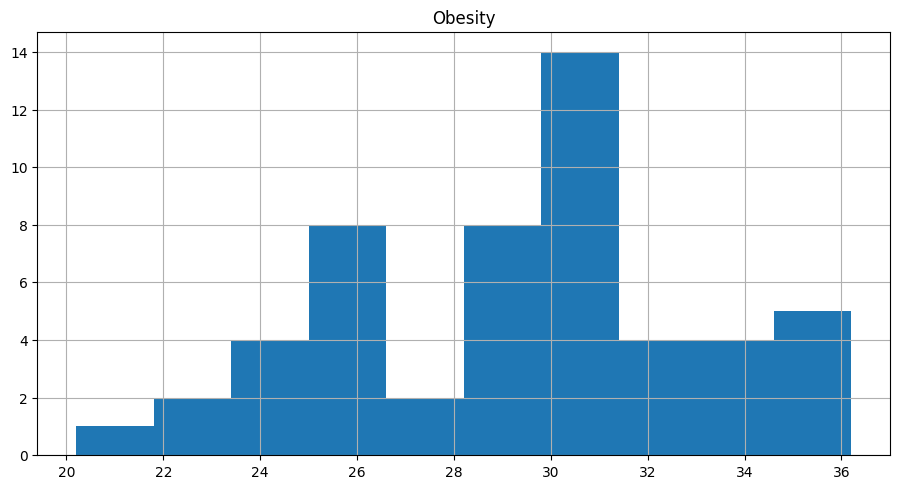

In [61]:

df2[['Obesity']].hist( figsize=(11,5.5))

### Observations #1

In the first visualization, it is evident that the "Obesity" column's frequency falls within the range of 20 to 38 (20%-38%). Within this dataset, it becomes apparent that the majority of states have obesity rates clustered around 30-32%. Specifically, this group encompasses 14 states.

In [62]:
# More code here to do a second visualization...
import matplotlib.pyplot as plt

plt.boxplot(df2.Obesity)

plt.title("boxplot")
plt.xlabel("total_area")
plt.ylabel("Obesity")


plt.show()

### Observations #2

In the second visualization, it is the boxplt which shows that 25%(Q1)is obesity is approximately 26, median is approximately 30, and 75% is approximately 32.Its minumn is 20, and the maxiumn is 36.
Moreover, in this boxplot, the median(Q2) is colse 75%, it indicates that the  data distribution is right-skewed (positively skewed).



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option